In [1]:
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows = None) # 避免警告数据量超过5000

data = pd.DataFrame([])
for date in pd.date_range('20180815140000','20180817165500',freq='5T'):
    file_path = '/home/zht/大论文/世博风廓线/5/CMAWIND/Z_RADA_I_58367_%s_P_WPRD_LC_ROBS.TXT'%date.strftime('%Y%m%d%H%M%S')
    with open(file_path, 'r') as f:
        i_data = pd.read_csv(f, sep=' ', skiprows=3, usecols=[0,1,2,3], header=None)
        i_data['time'] = date+pd.Timedelta('8H')
    data = data.append(i_data)

data.columns = ['height', 'direction', 'speed_H', 'speed_V', 'time']
data = data[data['height']!='NNNN'] 
data['height'] = [float(x) for x in data['height']]

In [2]:
data[data['time']=='2018-08-15 22:00:00']

,height,direction,speed_H,speed_V,time
0,100.0,061.0,000.5,0.0,2018-08-15 22:00:00
1,160.0,065.0,002.8,0.0,2018-08-15 22:00:00
2,220.0,055.0,004.4,0.0,2018-08-15 22:00:00
3,280.0,032.0,006.4,0.0,2018-08-15 22:00:00
4,340.0,047.0,006.4,-0.1,2018-08-15 22:00:00
...,...,...,...,...,...
94,5740.0,/////,/////,0.0,2018-08-15 22:00:00
95,5800.0,/////,/////,0.0,2018-08-15 22:00:00
96,5860.0,/////,/////,0.0,2018-08-15 22:00:00
97,5920.0,/////,/////,0.0,2018-08-15 22:00:00


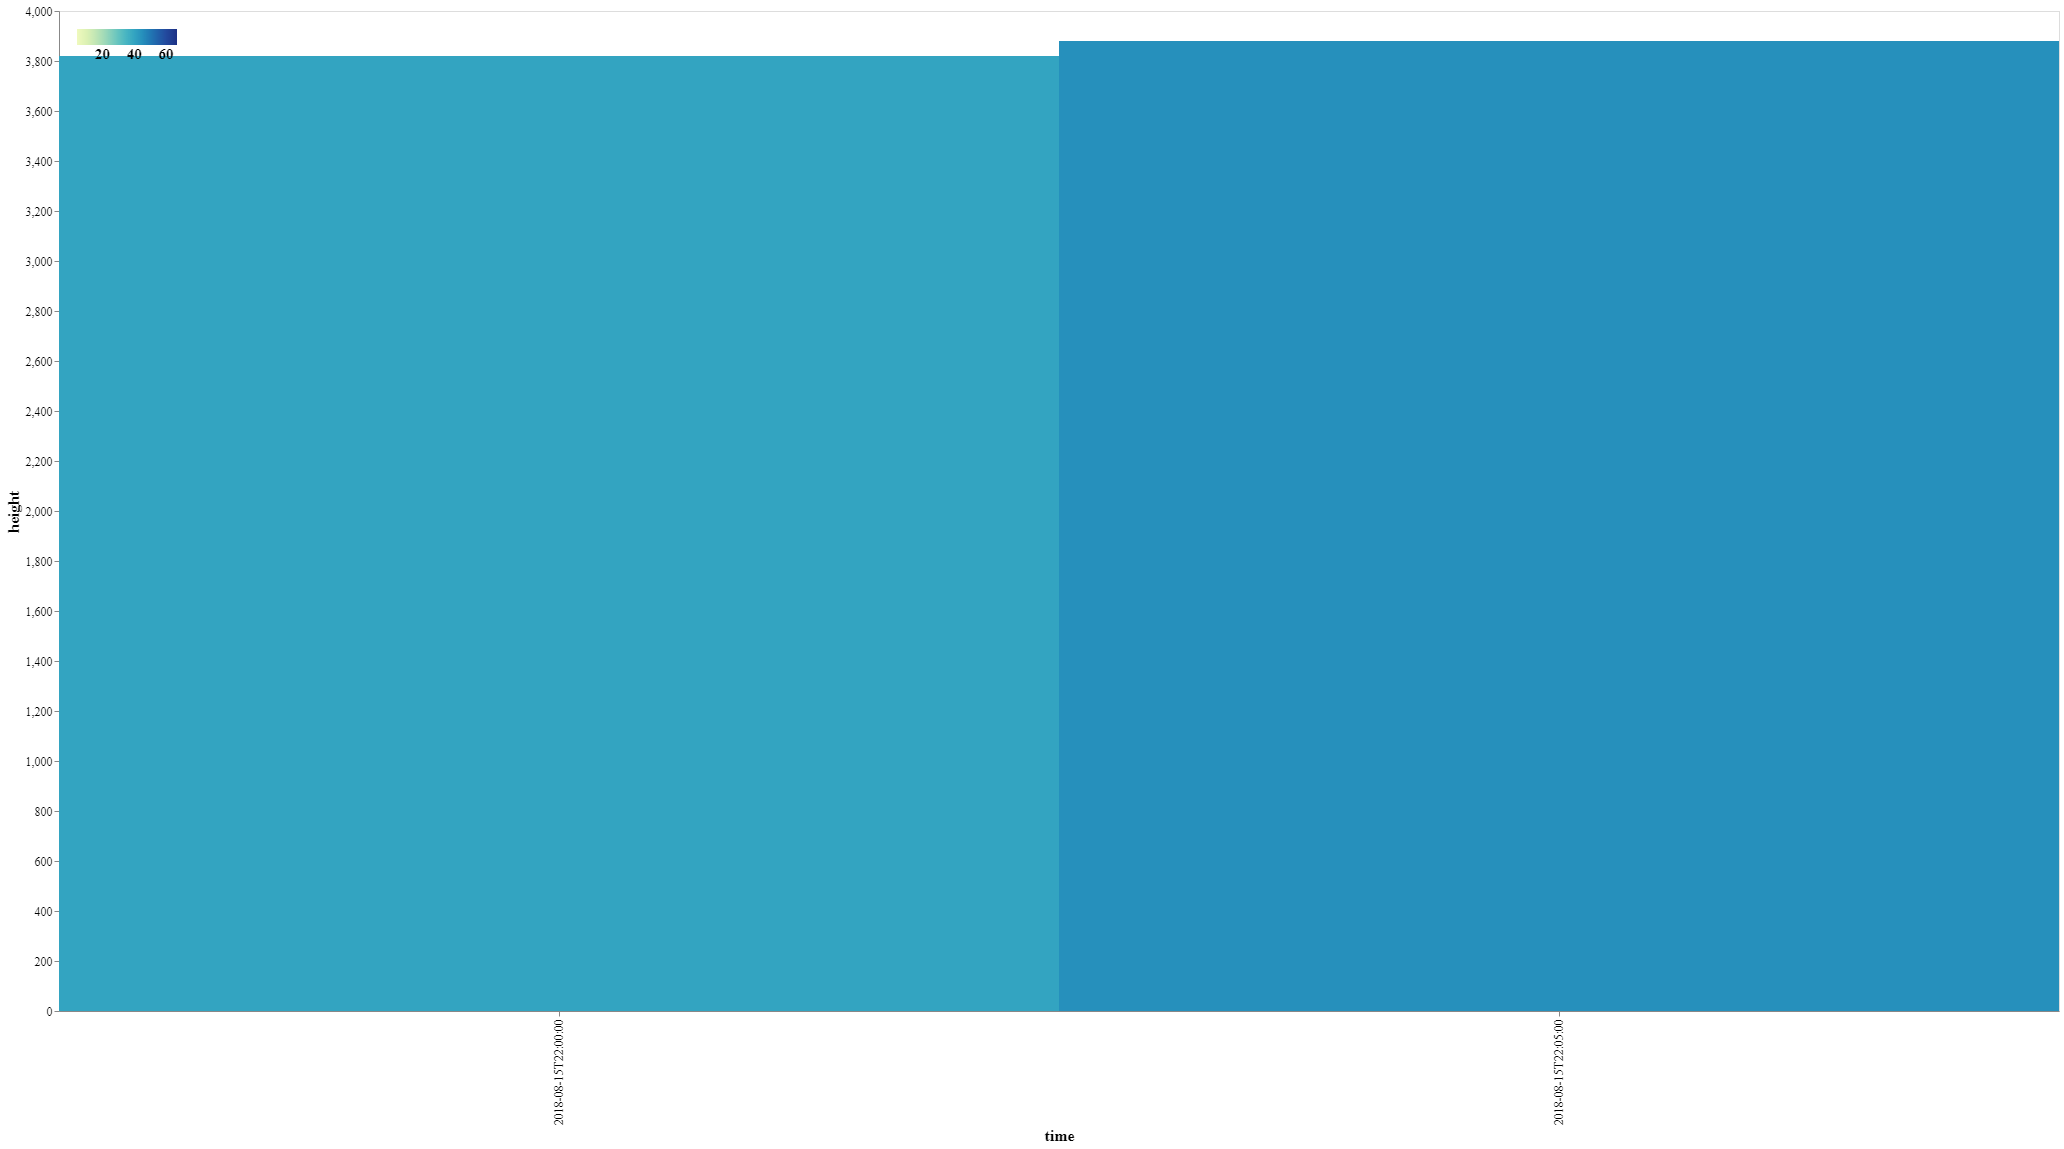

In [3]:
def alt_configure(chart):
    chart = (chart
             .properties(width=2000, height=1000)
             .configure_title(font='Times New Roman', fontSize=18, fontWeight='bold')
             .configure_axis(titleFontSize=16, labelFontSize=12, labelFont='Times New Roman', titleFont='Times New Roman')
             .configure_legend(title=None, labelFont='Times New Roman',labelFontSize=15, labelFontWeight='bold',
                               orient='top-left', symbolStrokeWidth=4, symbolSize=300,
                               rowPadding=15, labelLimit=400, symbolOffset=15)
             .interactive(bind_x = True) # 交互性设置
            )
    return(chart)

chart = alt.Chart(data[(data['time']=='2018-08-15 22:00:00')|(data['time']=='2018-08-15 22:05:00')]).mark_rect().encode(
    alt.X('time:O'),
    alt.Y('height:Q'),
    color='direction:Q'
)
alt_configure(chart)